In [1]:
import pandas as pd
import joblib
df = pd.read_csv('Entities.csv')
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


Description of the dataset

In [2]:
print(df.describe())
df.nunique()

          Unnamed: 0   property_id    location_id         price  \
count  168446.000000  1.684460e+05  168446.000000  1.684460e+05   
mean    84222.500000  1.559626e+07    4375.936395  1.776576e+07   
std     48626.316059  2.251207e+06    3776.561581  3.531003e+07   
min         0.000000  8.657500e+04       1.000000  0.000000e+00   
25%     42111.250000  1.488320e+07    1058.000000  1.750000e+05   
50%     84222.500000  1.665851e+07    3286.000000  8.500000e+06   
75%    126333.750000  1.708662e+07    7220.000000  1.950000e+07   
max    168445.000000  1.735772e+07   14220.000000  2.000000e+09   

            latitude      longitude          baths       bedrooms  \
count  168446.000000  168446.000000  168446.000000  168446.000000   
mean       29.859519      71.239804       2.874227       3.179422   
std         3.807870       3.133042       2.463400       1.971401   
min        11.052446      25.906027       0.000000       0.000000   
25%        24.948536      67.130363       0.000000 

Unnamed: 0       168446
property_id      168446
location_id        4198
page_url         168446
property_type         7
price              2077
location           1509
city                  5
province_name         3
latitude           7835
longitude          8308
baths                16
purpose               2
bedrooms             23
date_added          124
agency             5761
agent             10598
Total_Area          296
dtype: int64

Cleaning column names

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w]', "", regex= True)

In [4]:
df['location'].nunique()

1509

Converting data types

In [5]:
df.dtypes

unnamed_0          int64
property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
total_area       float64
dtype: object

In [6]:
categories = ['property_id', 'location_id', 'latitude', 'longitude', 'property_type', 'location', 'city', 'province_name', 'purpose', 'agency']
df[categories] = df[categories].astype('category')


df = df.drop('unnamed_0', axis=1)


In [7]:
print(df.isnull().sum())
df.isnull().mean() * 100

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
total_area           0
dtype: int64


property_id       0.000000
location_id       0.000000
page_url          0.000000
property_type     0.000000
price             0.000000
location          0.000000
city              0.000000
province_name     0.000000
latitude          0.000000
longitude         0.000000
baths             0.000000
purpose           0.000000
bedrooms          0.000000
date_added        0.000000
agency           26.163281
agent            26.163874
total_area        0.000000
dtype: float64

In [8]:
df["agency"] = df["agency"].cat.add_categories("Unknown").fillna("Unknown")
df['agent'] = df['agent'].fillna('Unknown')


In [9]:
df.duplicated().sum()

np.int64(0)

lets first drop extreme outliers from baths, bedrooms and total_area, because there are very few outliers causing distortions in analysis

In [10]:
num_col = ['price', 'baths', 'bedrooms', 'total_area']
upper = df[num_col].quantile(0.996)
df = df[(df[num_col] < upper).all(axis=1)]


Univariate analysis, to analyze each feature individually first

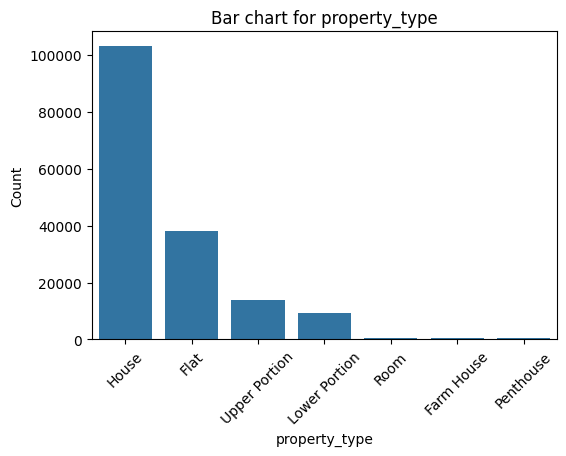

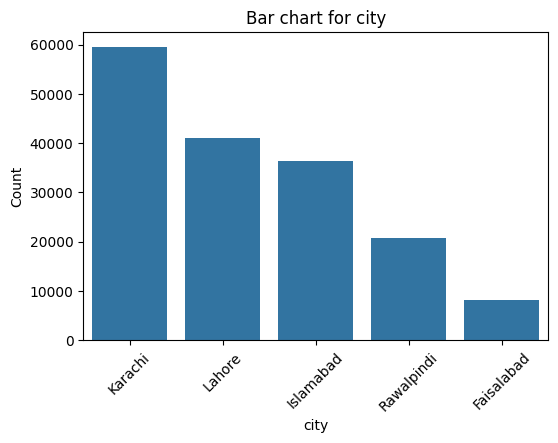

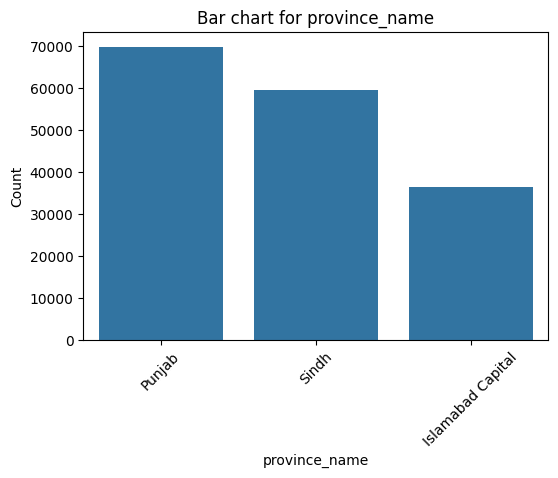

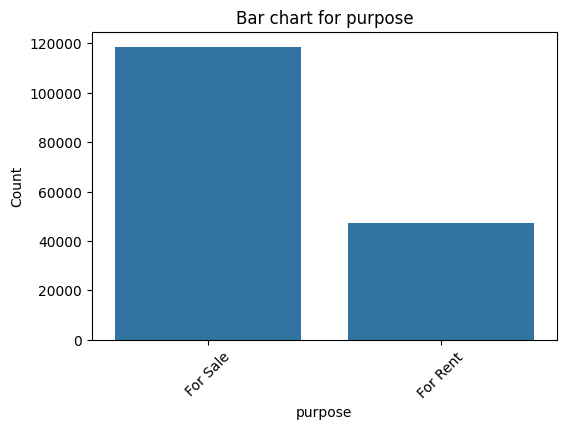

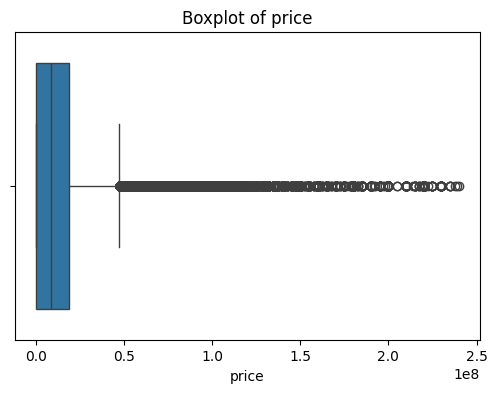

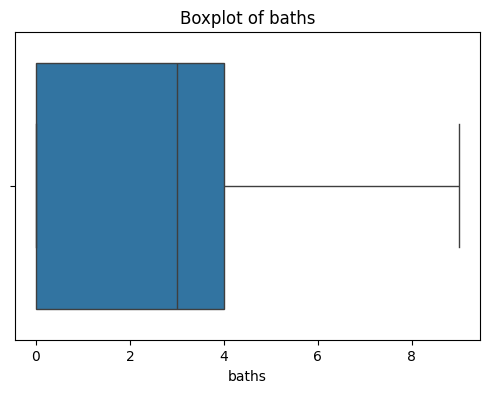

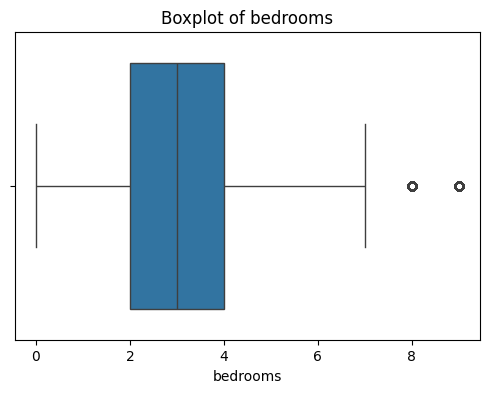

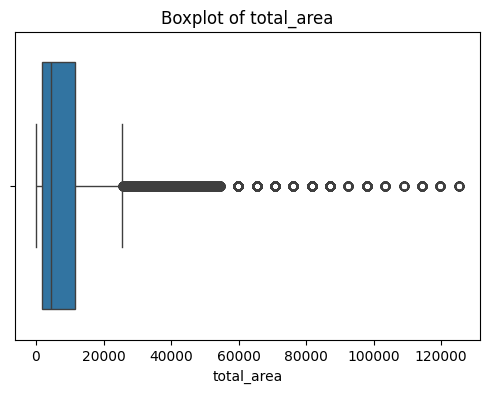

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = ['property_type', 'city', 'province_name', 'purpose']




# Bar charts for categorical columns

for col in cat_col:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Bar chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# Boxplot for numerical columns

for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])   # boxplot instead of histplot
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


our target variable is price, we will compare each feature with the target


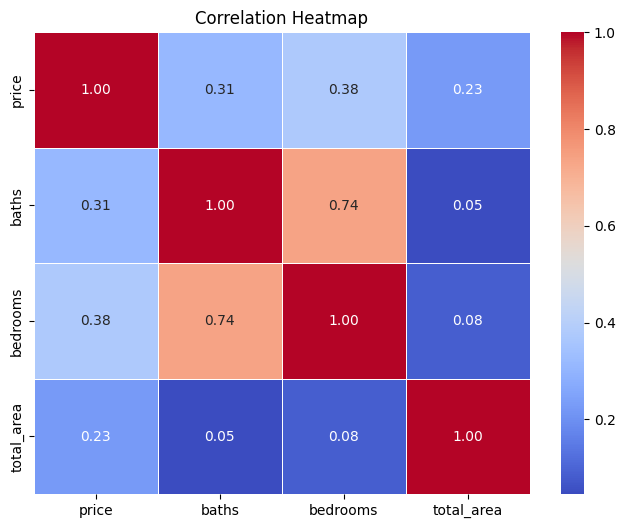

In [12]:


numeric_cols = ['price', 'baths', 'bedrooms', 'total_area']

plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()   # correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



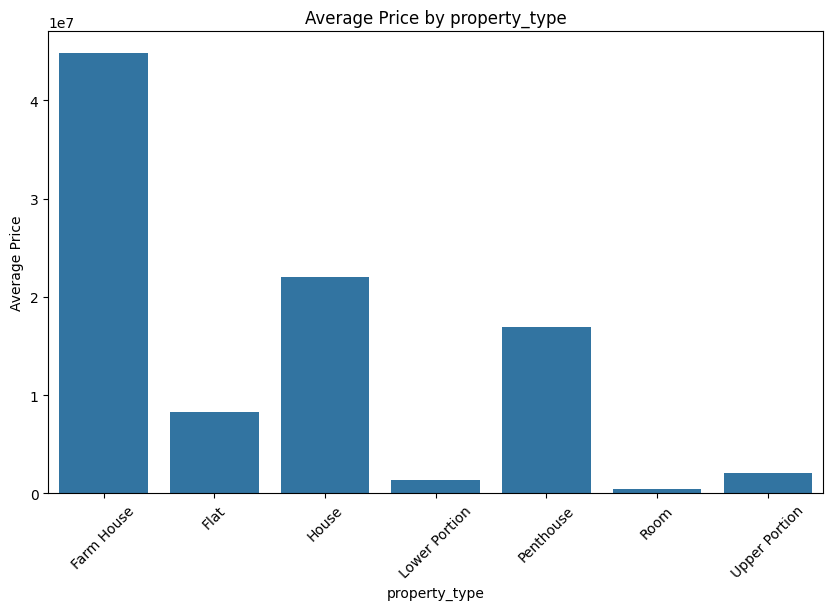

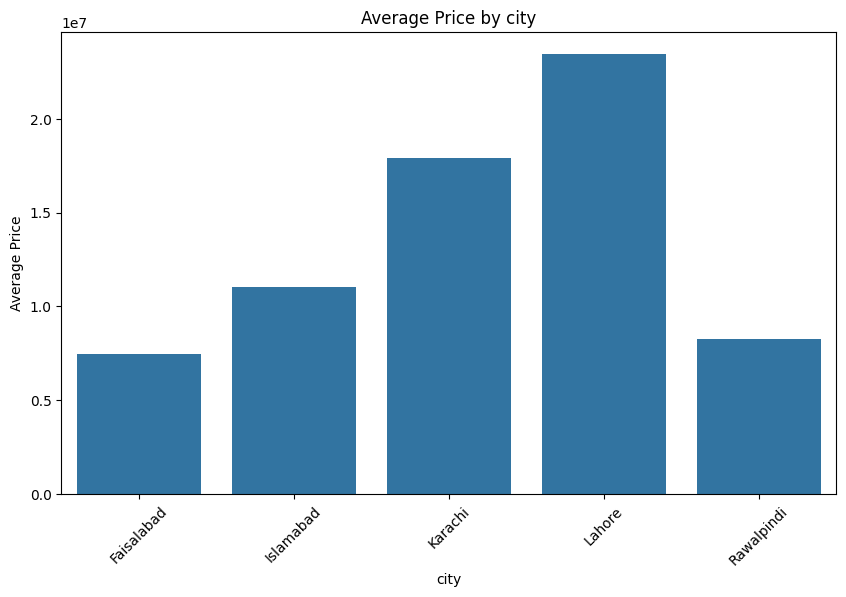

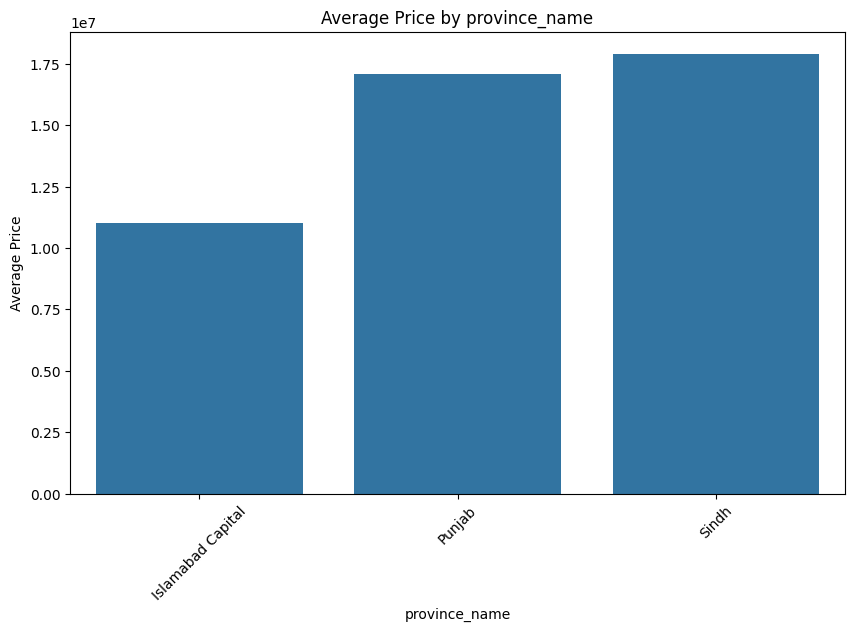

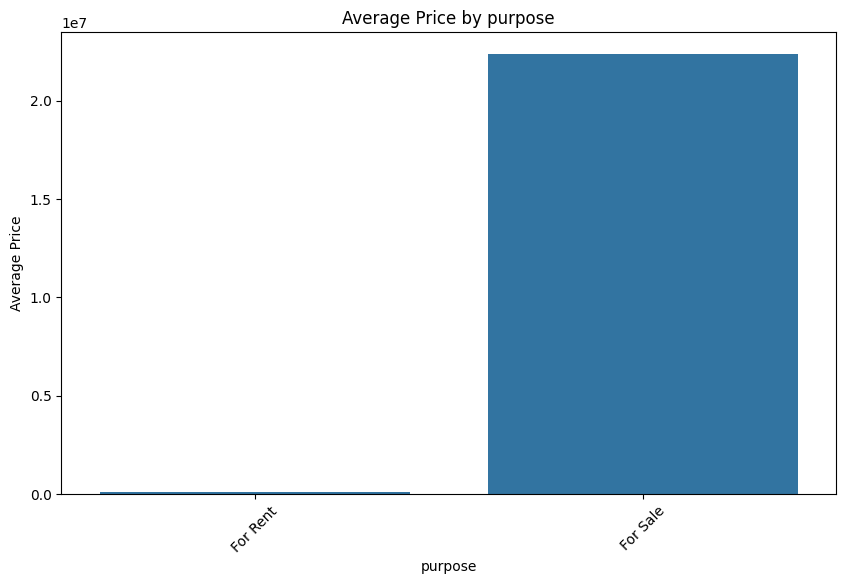

In [13]:

import numpy as np
cat_col = ['property_type', 'city', 'province_name', 'purpose']

for col in cat_col:
    plt.figure(figsize=(10, 6))
    # Barplot with mean price per category
    sns.barplot(x=col, y="price", data=df, estimator=np.mean, errorbar=None)  
    plt.xticks(rotation=45)
    plt.title(f"Average Price by {col}")
    plt.ylabel("Average Price")
    plt.xlabel(col)
    plt.show()

In [14]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,total_area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,Unknown,Unknown,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,Unknown,Unknown,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,Unknown,Unknown,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,Unknown,Unknown,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


dropping unwanted columns

In [15]:
df = df.drop(['agent', 'agency', 'date_added', 'province_name', 'latitude', 'longitude', 'page_url', 'location_id', 'property_id'], axis=1)

Handling Outliers


price

In [16]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (df['price'] < lower_bound) | (df['price'] > upper_bound )

print(df[outliers])
print(q3)
print(upper)

       property_type      price            location       city  baths  \
8              House   50000000         DHA Defence  Islamabad      7   
11              Flat   48000000  Diplomatic Enclave  Islamabad      2   
17             House   80000000         DHA Defence  Islamabad      7   
20             House   55000000                G-11  Islamabad      7   
22        Farm House   88500000           Bani Gala  Islamabad      3   
...              ...        ...                 ...        ...    ...   
168411         House  185000000      Cavalry Ground     Lahore      6   
168414         House   82500000         DHA Defence     Lahore      5   
168419         House   55000000         DHA Defence     Lahore      5   
168427         House   55000000         DHA Defence     Lahore      6   
168429         House  170000000         DHA Defence     Lahore      5   

         purpose  bedrooms  total_area  
8       For Sale         7    5445.000  
11      For Sale         2   21235.578  


Clipping the outliers

In [17]:
df['price'] = df['price'].clip(lower=lower_bound, upper=upper_bound)

Total_area

In [18]:
q1 = df['total_area'].quantile(0.25)
q3 = df['total_area'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (df['total_area'] < lower_bound) | (df['total_area'] > upper_bound)
# print(df[outliers].sum())
print(outliers.sum())

14728


In [19]:
df['total_area'] = df['total_area'].clip(lower= lower_bound, upper = upper_bound)

Outliers handling for baths and bedrooms

In [20]:
q1 = df['baths'].quantile(0.25)
q3 = df['baths'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (df['baths'] < lower_bound) | (df['baths'] > upper_bound)
# print(df[outliers].sum())
print(outliers.sum())

0


In [21]:
q1 = df['bedrooms'].quantile(0.25)
q3 = df['bedrooms'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (df['bedrooms'] < lower_bound) | (df['bedrooms'] > upper_bound)
# print(df[outliers].sum())
print(outliers.sum())

1892


In [22]:
df['bedrooms'] = df['bedrooms'].clip(lower= lower_bound, upper=upper_bound)

we have some data where number of bedrooms or baths is 0 which is not true for actual houses

In [23]:
print(df.shape[0])
print(df[df['baths'] == 0].shape[0])
print(df[df['bedrooms'] == 0].shape[0])
print(df[(df['baths']==0) & (df['bedrooms']==0)].head())

165844
41762
22435
   property_type     price                  location       city  baths  \
19          Flat   1750000        PWD Housing Scheme  Islamabad      0   
47         House  47260000                Model Town     Lahore      0   
60         House  18500000               Bahria Town     Lahore      0   
83         House  47260000  Valencia Housing Society     Lahore      0   
86         House  47260000  Valencia Housing Society     Lahore      0   

     purpose  bedrooms  total_area  
19  For Sale         0   4083.7650  
47  For Sale         0  25727.7195  
60  For Sale         0   2722.5100  
83  For Sale         0  10890.0000  
86  For Sale         0  10890.0000  


Splitting train and test dataset


In [24]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 42)

after splitting, we are going to fill all the 0 rooms or baths with the average in that total_area range

In [25]:
train['area_bins'], bins = pd.qcut(train['total_area'], q=10, retbins= True, duplicates = 'drop')
avg_rooms = train.groupby('area_bins')['bedrooms'].mean()
avg_baths = train.groupby('area_bins')['baths'].mean()


rooms_median = train['bedrooms'].median()
baths_median = train['baths'].median()

def fill_zeros (row):
    if row['bedrooms'] == 0:
        row['bedrooms'] = avg_rooms.loc[row['area_bins']] if row['area_bins'] in avg_rooms.index else rooms_median
    if row['baths'] == 0:
        row['baths'] = avg_baths.loc[row['area_bins']] if row['area_bins'] in avg_baths.index else baths_median
    return row


train = train.apply(fill_zeros, axis=1)

test['area_bins'] = pd.cut(test['total_area'], bins = bins, include_lowest = True)
test = test.apply(fill_zeros, axis=1)



import joblib

joblib.dump((bins, avg_rooms, avg_baths, rooms_median, baths_median), "baths_rooms_filling.pkl")




C:\Users\ibera\AppData\Local\Temp\ipykernel_13156\1736007210.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rooms = train.groupby('area_bins')['bedrooms'].mean()
C:\Users\ibera\AppData\Local\Temp\ipykernel_13156\1736007210.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_baths = train.groupby('area_bins')['baths'].mean()


['baths_rooms_filling.pkl']

In [26]:
train.columns

Index(['property_type', 'price', 'location', 'city', 'baths', 'purpose',
       'bedrooms', 'total_area', 'area_bins'],
      dtype='object')

Encoding property_type

In [27]:
import category_encoders as ce
import joblib

# Initialize encoder
encoder = ce.BinaryEncoder(cols=['property_type'])

# Fit and transform on train
train_encoded = encoder.fit_transform(train[['property_type']])
joblib.dump(encoder, 'property_type.pkl')

# Merge encoded columns back with original train DataFrame
train = train.drop(columns=['property_type'])
train = pd.concat([train, train_encoded], axis=1)

# Apply same transformation on test
test_encoded = encoder.transform(test[['property_type']])
test = test.drop(columns=['property_type'])
test = pd.concat([test, test_encoded], axis=1)

Encoding city

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown= 'ignore')

encoded_city = encoder.fit_transform(train[['city']])

encoded_city = encoded_city.toarray()

encoded_city = pd.DataFrame(encoded_city, columns= encoder.get_feature_names_out(['city']),index = train.index)


joblib.dump(encoder, 'city_encoder.pkl')

train = pd.concat([train, encoded_city], axis=1)

encoded_city = encoder.transform(test[['city']])

encoded_city = encoded_city.toarray()

encoded_city = pd.DataFrame(encoded_city, columns=encoder.get_feature_names_out(['city']), index = test.index) 




test = pd.concat([test, encoded_city], axis=1)




Encoding Location by mean encoding method

In [29]:
global_location_mean = df['price'].mean()

In [30]:
train.head()

,price,location,city,baths,purpose,bedrooms,total_area,area_bins,property_type_0,property_type_1,property_type_2,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi
127514,35000,Shaheed Millat Road,Karachi,2.000000,For Rent,2.000000,13340.2990,"(13068.048, 23413.586]",0,0,1,0.0,0.0,1.0,0.0,0.0
142438,47260000,Cantt,Karachi,5.000000,For Sale,5.000000,5445.0000,"(4356.016, 5445.0]",0,1,0,0.0,0.0,1.0,0.0,0.0
143164,52000,G-13,Islamabad,3.320900,For Rent,3.636353,3267.0120,"(2722.51, 4356.016]",0,1,1,0.0,1.0,0.0,0.0,0.0
35404,130000,I-8,Islamabad,3.000000,For Rent,3.000000,25727.7195,"(23413.586, 25727.72]",0,1,1,0.0,1.0,0.0,0.0,0.0
167692,22500000,Rehan Garden,Lahore,4.103366,For Sale,6.000000,5445.0000,"(4356.016, 5445.0]",0,1,0,0.0,0.0,0.0,1.0,0.0


In [31]:
# location_stats = train.groupby('location')['price'].agg(['mean', 'count'])

# k = 30

# location_stats['smoothed_mean'] = (location_stats['count'] * location_stats['mean'] + k * global_location_mean) / (location_stats['count'] + k)


# train['location_encoded'] = train['location'].map(location_stats['smoothed_mean'])
# test['location_encoded'] = test['location'].map(location_stats['smoothed_mean'])

# joblib.dump(location_stats['smoothed_mean'], 'location_means.pkl')

In [32]:
# import joblib

# # 1. Location-level stats
# location_stats = train.groupby('location')['price'].agg(['mean', 'count'])

# k = 30
# location_stats['smoothed_mean'] = (
#     (location_stats['count'] * location_stats['mean'] + k * global_location_mean) /
#     (location_stats['count'] + k)
# )

# # 2. City-level stats
# city_stats = train.groupby('city')['price'].agg(['mean', 'count'])
# city_stats['smoothed_mean'] = (
#     (city_stats['count'] * city_stats['mean'] + k * global_location_mean) /
#     (city_stats['count'] + k)
# )

# # 3. Map locations → smoothed mean
# train['location_encoded'] = train['location'].map(location_stats['smoothed_mean'])
# test['location_encoded'] = test['location'].map(location_stats['smoothed_mean'])

# # 4. Fill locations with count=1 using city smoothed mean
# rare_locations = location_stats[location_stats['count'] == 1].index

# train.loc[train['location'].isin(rare_locations), 'location_encoded'] = (
#     train.loc[train['location'].isin(rare_locations), 'city'].map(city_stats['smoothed_mean'])
# )

# test.loc[test['location'].isin(rare_locations), 'location_encoded'] = (
#     test.loc[test['location'].isin(rare_locations), 'city'].map(city_stats['smoothed_mean'])
# )

# # 5. If still missing (new/unseen city in test) → use global mean
# train['location_encoded'].fillna(global_location_mean, inplace=True)
# test['location_encoded'].fillna(global_location_mean, inplace=True)

# # 6. Save
# joblib.dump({
#     'location_means': location_stats['smoothed_mean'],
#     'city_means': city_stats['smoothed_mean'],
#     'global_mean': global_location_mean
# }, 'location_means.pkl')


In [33]:
import joblib

k = 20

# 1. City-level stats (smoothed with global)
city_stats = train.groupby('city')['price'].agg(['mean', 'count'])
city_stats['smoothed_mean'] = (
    (city_stats['count'] * city_stats['mean'] + k * global_location_mean) /
    (city_stats['count'] + k)
)

# 2. Location-level stats (smoothed with city mean instead of global)
location_stats = train.groupby(['city', 'location'])['price'].agg(['mean', 'count']).reset_index()

# Map each location's city smoothed mean
location_stats['city_smoothed'] = location_stats['city'].map(city_stats['smoothed_mean'])

location_stats['smoothed_mean'] = (
    (location_stats['count'] * location_stats['mean'] + k * location_stats['city_smoothed']) /
    (location_stats['count'] + k)
)

# 3. Create mapping dict {(city, location): smoothed_mean}
location_mapping = location_stats.set_index(['city', 'location'])['smoothed_mean']

# 4. Encode locations in train & test
train['location_encoded'] = train.set_index(['city', 'location']).index.map(location_mapping)
test['location_encoded'] = test.set_index(['city', 'location']).index.map(location_mapping)


# 5. Fallback to city means if location missing
train['location_encoded'].fillna(train['city'].map(city_stats['smoothed_mean']), inplace=True)
test['location_encoded'].fillna(test['city'].map(city_stats['smoothed_mean']), inplace=True)

# 6. Fallback to global mean if city also missing
train['location_encoded'].fillna(global_location_mean, inplace=True)
test['location_encoded'].fillna(global_location_mean, inplace=True)

# 7. Save mapping
joblib.dump({
    'location_means': location_mapping,
    'city_means': city_stats['smoothed_mean'],
    'global_mean': global_location_mean
}, 'location_means.pkl')


['location_means.pkl']

Label encoding purpose, 0: rent, 1: sale

In [34]:
train['purpose'] = train['purpose'].map({'For Rent': 0, 'For Sale': 1})
test['purpose'] = test['purpose'].map({'For Rent': 0, 'For Sale': 1})

Scaling numerical features

Scaling price

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['baths', 'bedrooms', 'total_area']] = scaler.fit_transform(train[['baths', 'bedrooms', 'total_area']])

joblib.dump(scaler, 'main_scaler.pkl')

test[['baths', 'bedrooms', 'total_area']] = scaler.transform(test[['baths', 'bedrooms', 'total_area']])

In [36]:
scaler = StandardScaler()
train[['price']] = scaler.fit_transform(train[['price']])

joblib.dump(scaler, 'price_scaler.pkl')

test[['price']] = scaler.transform(test[['price']])

we have another feature 'location_encoded' that might have outliers

In [37]:
q1 = train['location_encoded'].quantile(0.25)
q3 = train['location_encoded'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (train['location_encoded'] < lower_bound) | (train['location_encoded'] > upper_bound)
# print(df[outliers].sum())
print(outliers.sum())

7578


In [38]:
train['location_encoded'] = train['location_encoded'].clip(lower=lower_bound, upper=upper_bound)

In [39]:
q1 = test['location_encoded'].quantile(0.25)
q3 = test['location_encoded'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (test['location_encoded'] < lower_bound) | (test['location_encoded'] > upper_bound)
# print(df[outliers].sum())
print(outliers.sum())

1820


In [40]:
test['location_encoded'] = test['location_encoded'].clip(lower=lower_bound, upper=upper_bound)

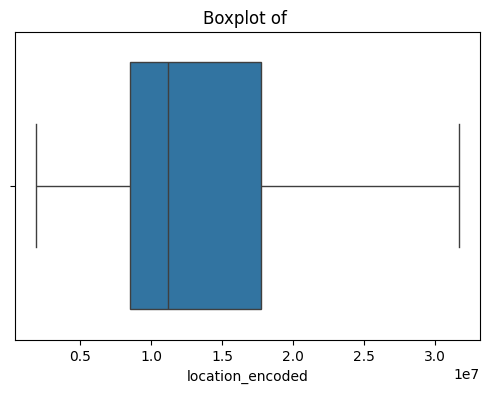

In [41]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=train['location_encoded'])   # boxplot instead of histplot
plt.title(f'Boxplot of ')
plt.xlabel('location_encoded')
plt.show()

Using robust scaling

In [42]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
train[['location_encoded']] = scaler.fit_transform(train[['location_encoded']])
joblib.dump(scaler, 'location_area_avg.pkl')
test[['location_encoded']] = scaler.transform(test[['location_encoded']]) 


In [43]:
test_final = test.drop(['location', 'area_bins', 'city'], axis=1)
train_final = train.drop(['location', 'area_bins', 'city'], axis = 1)



Applying Model

In [44]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------
# 1. Separate features & target
# -------------------
target_col = 'price'  # change if your target column is named differently

X_train = train_final.drop(columns=[target_col])
y_train = train_final[target_col]

X_test = test_final.drop(columns=[target_col])
y_test = test_final[target_col]

# -------------------
# 2. Train model
# -------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------
# 3. Predictions
# -------------------
y_pred = model.predict(X_test)

# -------------------
# 4. Metrics
# -------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# -------------------
# 5. (Optional) Inspect Coefficients
# -------------------
coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print("\n🔍 Model Coefficients:")
print(coeffs)


📊 Linear Regression Performance:
Mean Squared Error (MSE): 0.33
Root Mean Squared Error (RMSE): 0.58
Mean Absolute Error (MAE): 0.44
R² Score: 0.6638

🔍 Model Coefficients:
             Feature  Coefficient
0              baths     0.115874
1            purpose     1.170790
2           bedrooms     0.224924
3         total_area     0.116948
4    property_type_0    -0.083622
5    property_type_1     0.172196
6    property_type_2     0.138907
7    city_Faisalabad     0.237844
8     city_Islamabad     0.217791
9       city_Karachi    -0.078159
10       city_Lahore    -0.524730
11   city_Rawalpindi     0.147255
12  location_encoded     0.669132


applying multiple models

In [45]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor   # install xgboost if needed

# -------------------
# Helper: Train & Evaluate
# -------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {
        "Model": model.__class__.__name__,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    }

# -------------------
# Models to compare
# -------------------
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.001),
    RandomForestRegressor(n_estimators=200, random_state=42),
    GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, objective="reg:squarederror")
]

results = []
for model in models:
    results.append(evaluate_model(model, X_train, y_train, X_test, y_test))

results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:")
print(results_df.sort_values(by="RMSE"))



📊 Model Comparison:
                       Model       MSE      RMSE       MAE        R²
3      RandomForestRegressor  0.085451  0.292319  0.140745  0.914218
5               XGBRegressor  0.086621  0.294314  0.163858  0.913044
4  GradientBoostingRegressor  0.126249  0.355315  0.221848  0.873262
0           LinearRegression  0.334891  0.578698  0.439973  0.663810
1                      Ridge  0.334891  0.578698  0.439969  0.663810
2                      Lasso  0.335048  0.578834  0.439446  0.663653


In [46]:
import joblib

# -------------------
# Find best model
# -------------------
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # row with lowest RMSE
print("\n🏆 Best Model:")
print(best_result)

# Get the actual trained model instance
best_model_name = best_result["Model"]
for model in models:
    if model.__class__.__name__ == best_model_name:
        best_model = model
        break



# -------------------
# Save the model
# -------------------
joblib.dump(best_model, "final_model.pkl")
print("✅ Model saved as best_model.pkl")



🏆 Best Model:
Model    RandomForestRegressor
MSE                   0.085451
RMSE                  0.292319
MAE                   0.140745
R²                    0.914218
Name: 3, dtype: object
✅ Model saved as best_model.pkl


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example: X = features, y = target
# Replace this with your actual dataset
# X, y = df.drop("target", axis=1), df["target"]

# Train-test split


# Define model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define hyperparameter space (not too big)
param_dist = {
    "n_estimators": [100, 200, 300],            # number of trees
    "max_depth": [10, 20, 30, None],            # limit depth to avoid overfitting
    "min_samples_split": [2, 5, 10],            # min samples to split a node
    "min_samples_leaf": [1, 2, 4],              # min samples at leaf
    "max_features": ["sqrt", "log2"],           # number of features to consider
}

# Randomized Search (faster than grid search)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,               # number of random combinations to try
    cv=3,                    # 3-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Predict on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
MSE: 0.0840742553682503
RMSE: 0.28995560930640796
MAE: 0.14437476516087355
R²: 0.9155998425720283


In [51]:
from tqdm.notebook import tqdm  # progress bar in Jupyter

# Wrap RandomizedSearchCV with tqdm
class TQDMSearchCV(RandomizedSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = len(self.cv_results_['params']) if hasattr(self, 'cv_results_') else self.n_iter
        with tqdm(total=n_candidates, desc="Tuning Progress", unit="model") as pbar:
            def callback(*args, **kwargs):
                pbar.update(1)
            self._callback = callback
            return super().fit(X, y, **fit_params)

# Define new parameter space (exclude already tested ones)
param_dist_new = {
    "bootstrap": [True, False],                # whether bootstrap samples are used
    "max_samples": [0.5, 0.7, 0.9, None],      # fraction of samples if bootstrap=True
    "min_weight_fraction_leaf": [0.0, 0.01, 0.05],  # weighted minimum leaf fraction
    "ccp_alpha": [0.0, 0.01, 0.05],            # cost complexity pruning
    "max_leaf_nodes": [None, 100, 300, 500],   # limit number of leaf nodes
    "warm_start": [True, False],               # reuse results for faster runs
}

# Random Forest model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Randomized Search with progress bar
search = TQDMSearchCV(
    estimator=rf,
    param_distributions=param_dist_new,
    n_iter=15,                     # fewer iterations to save time
    scoring="r2",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit search with progress updates
search.fit(X_train, y_train)

print("Best parameters found:", search.best_params_)
print("Best R²:", search.best_score_)

# Evaluate on test set
y_pred = search.best_estimator_.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R²:", r2_score(y_test, y_pred))

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
unique_items = df.groupby("city")["location"].unique()

# Convert to dictionary for full view
unique_dict = unique_items.to_dict()

# Print nicely
for city, locations in unique_dict.items():
    print(f"{city}: {list(locations)}\n")

In [ ]:
# Step 1: group by city and collect unique locations
locations_by_city = (
    df.groupby("city")["location"]
      .apply(lambda x: sorted(set(x), key=lambda y: (str(y).lower(), y)))
      .to_dict()
)

# Step 2: print in the format you want
print("LOCATIONS_BY_CITY = {")
for city, locations in locations_by_city.items():
    print(f"    '{city}': {locations},")
print("}")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- 1) Define base model
knn = KNeighborsRegressor()

# --- 2) Hyperparameter grid
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 15, 25],
    "weights": ["uniform", "distance"],   # distance gives more weight to closer neighbors
    "p": [1, 2]                           # 1=Manhattan, 2=Euclidean
}

# --- 3) Grid search with cross-validation
grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)

# --- 4) Evaluate on test set
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # instead of squared=False
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:,.0f}")
print(f"Test MAE:  {mae:,.0f}")
print(f"Test R²:   {r2:.3f}")


In [ ]:
# 1) Print first few predictions and true values
print("Sample predictions vs true values:")
for true, pred in list(zip(y_test[:10], y_pred[:10])):
    print(f"True: {true}, Predicted: {pred}")

# 2) Check if they are exactly the same
print("Are predictions exactly equal to y_test?", np.allclose(y_test, y_pred))

# 3) Look at the error distribution
errors = y_test - y_pred
print("Mean error:", np.mean(errors))
print("Std of errors:", np.std(errors))
print("Unique errors:", np.unique(errors)[:10])  # show first 10 unique error values

# 4) Print raw RMSE/MAE without rounding
rmse_raw = np.sqrt(mean_squared_error(y_test, y_pred))
mae_raw = mean_absolute_error(y_test, y_pred)
print("Raw RMSE:", rmse_raw)
print("Raw MAE:", mae_raw)
